<a href="https://colab.research.google.com/github/zzmtsvv/mlinvest/blob/main/finance0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install yahoo_fin
! pip install yfinance

In [2]:
! pip install tslearn

In [3]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [4]:
import yahoo_fin.stock_info as si
sp500 = si.tickers_sp500()

In [5]:
def get_info(ticker_obj):
  info_keys = ['shortName', 'sector', 'industry', 'country', 'market']
  info_values = []
  for key in info_keys:
    info_values.append(ticker_obj.info.get(key, None))
  return dict(zip(info_keys, info_values))

In [6]:
stocks = []
ticker_list = ['alrs.me', 'fxru.me', 'fxwo.me', 'dsky.me', 'moex.me', 'lnta.me',
               'gazp.me', 'mtss.me', 'zyne', 'tatn.me', 'f', 'chmf.me',
               'dte.de', 'levi', 'hpq', 'gps', 'poly.me', 'five.me', 'cour',
               'bac', 'pfe', 'hhr.me', 'ozon',
               'lyft', 'tsla', 'coke', 'gs', 'tgt', 'vow3.de', 'mcd', 'spot',
               'nvda', 'tm', 'nike', 'jpm', 'lkoh.me', 'gm', 'bayn.de',
               'fxcn.me', 'sbspb.me', 'fxmm.me', 'fxru.me', 'fxgd.me', 'fxtb.me',
               'ms', 'rblx', 'rual.me', 'sber.me', 'hydr.me']
# tickers = ticker_list
tickers = np.random.choice(sp500, size=100)

for ticker in tqdm(ticker_list):
  try:
    ticker_obj = yf.Ticker(ticker)
    info = get_info(ticker_obj)
    close_price = ticker_obj.history(period='3mo')['Close'].to_dict()
    info.update(close_price)
    stocks.append(info)
  except:
    print('fail', ticker)

stocks = pd.DataFrame(stocks)

  0%|          | 0/49 [00:00<?, ?it/s]

- FXRU.ME: None
- HHR.ME: No data found, symbol may be delisted
- NIKE: No data found, symbol may be delisted
- SBSPB.ME: None
- FXMM.ME: None
- FXRU.ME: None
- FXTB.ME: None


In [14]:
temp = stocks.dropna(axis=0, how='all')

temp.fillna(temp.mean(), inplace=True)

temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,shortName,sector,industry,country,market,2021-10-13 00:00:00,2021-10-14 00:00:00,2021-10-15 00:00:00,2021-10-18 00:00:00,2021-10-19 00:00:00,2021-10-20 00:00:00,2021-10-21 00:00:00,2021-10-22 00:00:00,2021-10-25 00:00:00,2021-10-26 00:00:00,2021-10-27 00:00:00,2021-10-28 00:00:00,2021-10-29 00:00:00,2021-11-01 00:00:00,2021-11-02 00:00:00,2021-11-03 00:00:00,2021-11-05 00:00:00,2021-11-08 00:00:00,2021-11-09 00:00:00,2021-11-10 00:00:00,2021-11-11 00:00:00,2021-11-12 00:00:00,2021-11-15 00:00:00,2021-11-16 00:00:00,2021-11-17 00:00:00,2021-11-18 00:00:00,2021-11-19 00:00:00,2021-11-22 00:00:00,2021-11-23 00:00:00,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,2021-12-08 00:00:00,2021-12-09 00:00:00,2021-12-10 00:00:00,2021-12-13 00:00:00,2021-12-14 00:00:00,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2021-11-04 00:00:00,2021-12-31 00:00:00,2022-01-07 00:00:00
0,ALROSA PJSC,Basic Materials,Other Precious Metals & Mining,Russia,ru_market,131.243256,129.305511,128.800003,128.910004,131.850006,131.570007,131.320007,127.379997,128.179993,131.309998,129.679993,129.429993,125.279999,130.699997,132.100006,130.160004,128.360001,132.399994,130.630005,132.240005,134.059998,131.300003,131.130005,132.029999,132.440002,134.699997,130.229996,125.860001,130.580002,126.800003,125.190002,121.300003,125.239998,127.860001,129.580002,130.009995,126.839996,124.769997,128.059998,126.269997,126.580002,121.970001,115.449997,116.620003,116.629997,117.040001,114.910004,113.839996,113.300003,114.279999,113.949997,115.150002,116.480003,119.779999,120.169998,122.720001,123.000000,123.699997,119.309998,118.650002,116.470001,121.300003,119.470001,172.822661,181.501428,167.795120
1,FINEX FUNDS ICAV,None,None,None,ru_market,944.054895,520.059433,521.153106,524.941506,527.675890,531.000025,525.203906,525.242472,536.501936,533.046020,530.957935,528.565038,527.789834,536.586226,532.032395,531.652127,529.678350,532.707872,528.088174,532.828771,534.729532,530.500206,531.248182,533.101811,530.890585,526.645678,520.577779,516.914703,517.613786,518.343924,895.227229,500.639931,506.533065,500.919043,505.085498,506.799821,497.004095,495.275727,504.058798,499.394857,498.787553,496.631743,483.881235,485.283445,485.027218,491.463058,488.144219,484.498399,489.195053,495.159853,493.129514,1001.348831,510.040718,511.688409,498.374030,504.354324,525.383465,514.204141,507.829077,506.644191,504.940504,520.769377,517.413851,172.822661,181.501428,167.795120
2,FINEX FUNDS ICAV,None,None,None,ru_market,0.024610,0.024900,0.025160,0.025190,0.025430,0.025480,0.025430,0.025390,0.025440,0.025490,0.025410,0.025510,0.025400,0.025550,0.025510,0.025610,0.025730,0.025780,0.025680,0.025500,0.025590,0.025760,0.025810,0.025880,0.025760,0.025720,0.025740,0.025490,0.025430,0.025370,0.025410,0.024880,0.024960,0.024630,0.024690,0.024720,0.024490,0.024620,0.025180,0.025290,0.025170,0.025240,0.025030,0.024840,0.025000,0.025000,0.024770,0.024400,0.024830,0.025020,0.025200,0.025200,510.040718,511.688409,0.025320,0.025330,525.383465,0.025410,0.025120,0.024890,0.024930,0.025120,0.025440,172.822661,181.501428,167.795120
3,DETSKY MIR PUBLIC,Consumer Cyclical,Department Stores,Russia,ru_market,131.237778,132.542862,130.028656,129.318527,128.589218,130.105423,129.030655,129.280151,129.510468,129.817535,129.165009,130.412491,131.180191,131.947891,130.700394,132.485275,132.043869,134.174225,138.185440,138.588470,138.051086,136.611664,137.744003,134.385330,133.924713,134.730789,133.943909,133.214600,129.356918,129.817535,130.662003

In [15]:
stocks.dropna(axis=0, how='all', inplace=False)

stocks.fillna(stocks.mean(), inplace=True)

stocks

,shortName,sector,industry,country,market,2021-10-13 00:00:00,2021-10-14 00:00:00,2021-10-15 00:00:00,2021-10-18 00:00:00,2021-10-19 00:00:00,2021-10-20 00:00:00,2021-10-21 00:00:00,2021-10-22 00:00:00,2021-10-25 00:00:00,2021-10-26 00:00:00,2021-10-27 00:00:00,2021-10-28 00:00:00,2021-10-29 00:00:00,2021-11-01 00:00:00,2021-11-02 00:00:00,2021-11-03 00:00:00,2021-11-05 00:00:00,2021-11-08 00:00:00,2021-11-09 00:00:00,2021-11-10 00:00:00,2021-11-11 00:00:00,2021-11-12 00:00:00,2021-11-15 00:00:00,2021-11-16 00:00:00,2021-11-17 00:00:00,2021-11-18 00:00:00,2021-11-19 00:00:00,2021-11-22 00:00:00,2021-11-23 00:00:00,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00,2021-12-06 00:00:00,2021-12-07 00:00:00,2021-12-08 00:00:00,2021-12-09 00:00:00,2021-12-10 00:00:00,2021-12-13 00:00:00,2021-12-14 00:00:00,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2021-11-04 00:00:00,2021-12-31 00:00:00,2022-01-07 00:00:00
0,ALROSA PJSC,Basic Materials,Other Precious Metals & Mining,Russia,ru_market,131.243256,129.305511,128.800003,128.910004,131.850006,131.570007,131.320007,127.379997,128.179993,131.309998,129.679993,129.429993,125.279999,130.699997,132.100006,130.160004,128.360001,132.399994,130.630005,132.240005,134.059998,131.300003,131.130005,132.029999,132.440002,134.699997,130.229996,125.860001,130.580002,126.800003,125.190002,121.300003,125.239998,127.860001,129.580002,130.009995,126.839996,124.769997,128.059998,126.269997,126.580002,121.970001,115.449997,116.620003,116.629997,117.040001,114.910004,113.839996,113.300003,114.279999,113.949997,115.150002,116.480003,119.779999,120.169998,122.720001,123.000000,123.699997,119.309998,118.650002,116.470001,121.300003,119.470001,172.822661,181.501428,167.795120
1,FINEX FUNDS ICAV,None,None,None,ru_market,944.054895,520.059433,521.153106,524.941506,527.675890,531.000025,525.203906,525.242472,536.501936,533.046020,530.957935,528.565038,527.789834,536.586226,532.032395,531.652127,529.678350,532.707872,528.088174,532.828771,534.729532,530.500206,531.248182,533.101811,530.890585,526.645678,520.577779,516.914703,517.613786,518.343924,895.227229,500.639931,506.533065,500.919043,505.085498,506.799821,497.004095,495.275727,504.058798,499.394857,498.787553,496.631743,483.881235,485.283445,485.027218,491.463058,488.144219,484.498399,489.195053,495.159853,493.129514,1001.348831,510.040718,511.688409,498.374030,504.354324,525.383465,514.204141,507.829077,506.644191,504.940504,520.769377,517.413851,172.822661,181.501428,167.795120
2,FINEX FUNDS ICAV,None,None,None,ru_market,0.024610,0.024900,0.025160,0.025190,0.025430,0.025480,0.025430,0.025390,0.025440,0.025490,0.025410,0.025510,0.025400,0.025550,0.025510,0.025610,0.025730,0.025780,0.025680,0.025500,0.025590,0.025760,0.025810,0.025880,0.025760,0.025720,0.025740,0.025490,0.025430,0.025370,0.025410,0.024880,0.024960,0.024630,0.024690,0.024720,0.024490,0.024620,0.025180,0.025290,0.025170,0.025240,0.025030,0.024840,0.025000,0.025000,0.024770,0.024400,0.024830,0.025020,0.025200,0.025200,510.040718,511.688409,0.025320,0.025330,525.383465,0.025410,0.025120,0.024890,0.024930,0.025120,0.025440,172.822661,181.501428,167.795120
3,DETSKY MIR PUBLIC,Consumer Cyclical,Department Stores,Russia,ru_market,131.237778,132.542862,130.028656,129.318527,128.589218,130.105423,129.030655,129.280151,129.510468,129.817535,129.165009,130.412491,131.180191,131.947891,130.700394,132.485275,132.043869,134.174225,138.185440,138.588470,138.051086,136.611664,137.744003,134.385330,133.924713,134.730789,133.943909,133.214600,129.356918,129.817535,130.662003

In [16]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(stocks.iloc[:, 5:].T).T

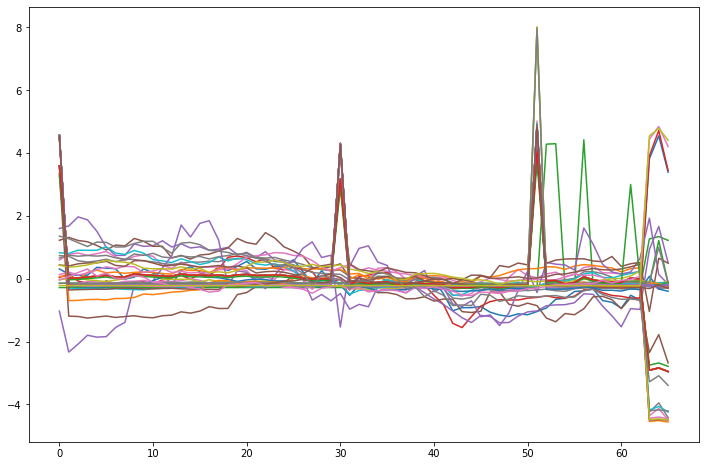

In [17]:
plt.figure(figsize=(12,8))
plt.plot(tickers_scaled.T)

  0%|          | 0/9 [00:00<?, ?it/s]

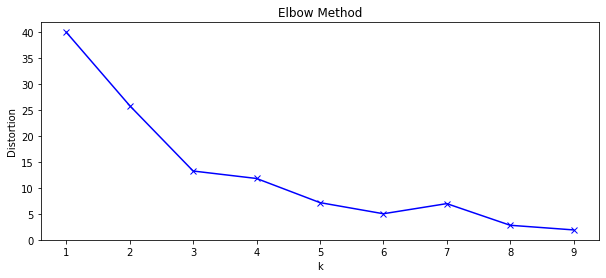

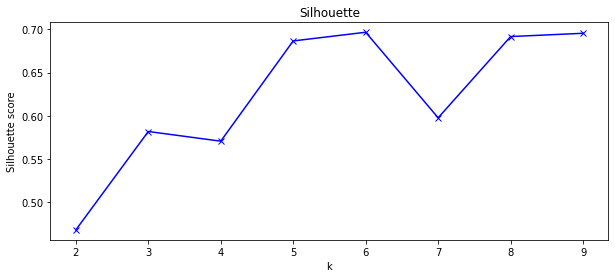

In [18]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    km = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10)
    km.fit(tickers_scaled)
    distortions.append(km.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, km.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

In [19]:
n_clusters = 3
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=3, max_iter=10)
ts_kmeans.fit(tickers_scaled)

TimeSeriesKMeans(max_iter=10, n_jobs=3)

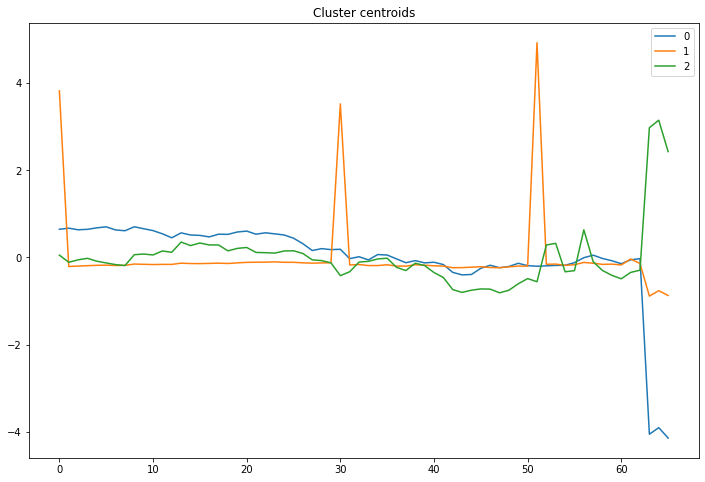

In [20]:
plt.figure(figsize=(12,8))
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [21]:
stocks['cluster'] = ts_kmeans.predict(tickers_scaled)
pd.DataFrame(stocks.groupby('cluster')['sector'].value_counts())

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 49 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


sector
cluster sector                        
0       Energy                       3
        Basic Materials              2
        Communication Services       1
        Consumer Cyclical            1
        Consumer Defensive           1
        Financial Services           1
1       Consumer Cyclical            8
        Financial Services           4
        Communication Services       3
        Consumer Defensive           3
        Healthcare                   3
        Technology                   3
2       Basic Materials              2
        Consumer Cyclical            2
        Financial Services           1
        Utilities                    1

In [22]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0] / 4)),
        4,
        figsize=(15, 3 * int(np.ceil(current_cluster.shape[0] / 4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}\n{row.sector}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


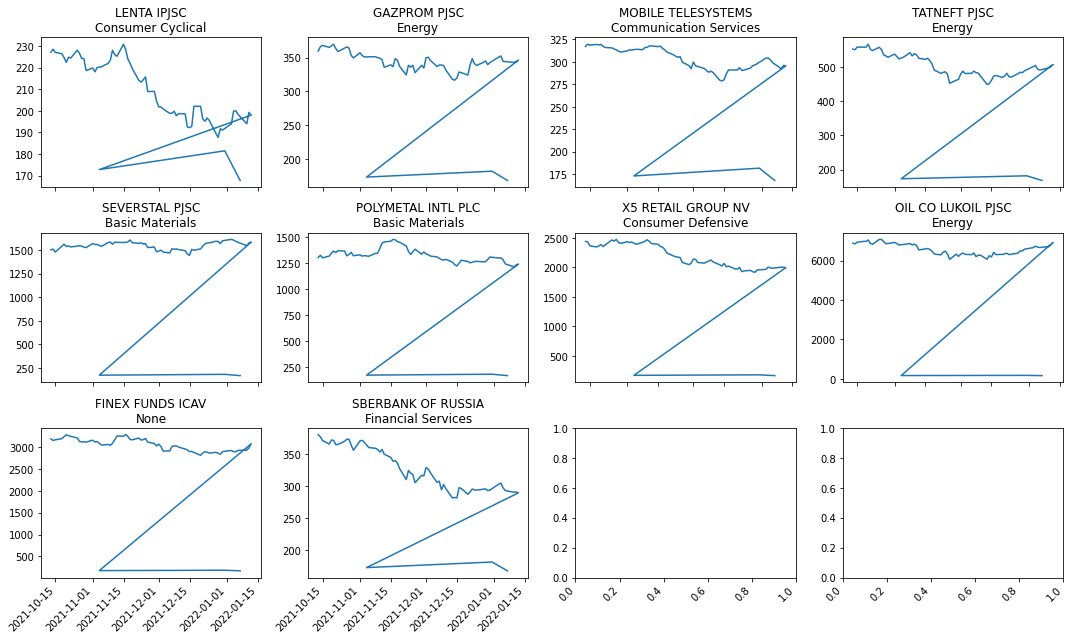

                          Cluster number: 1


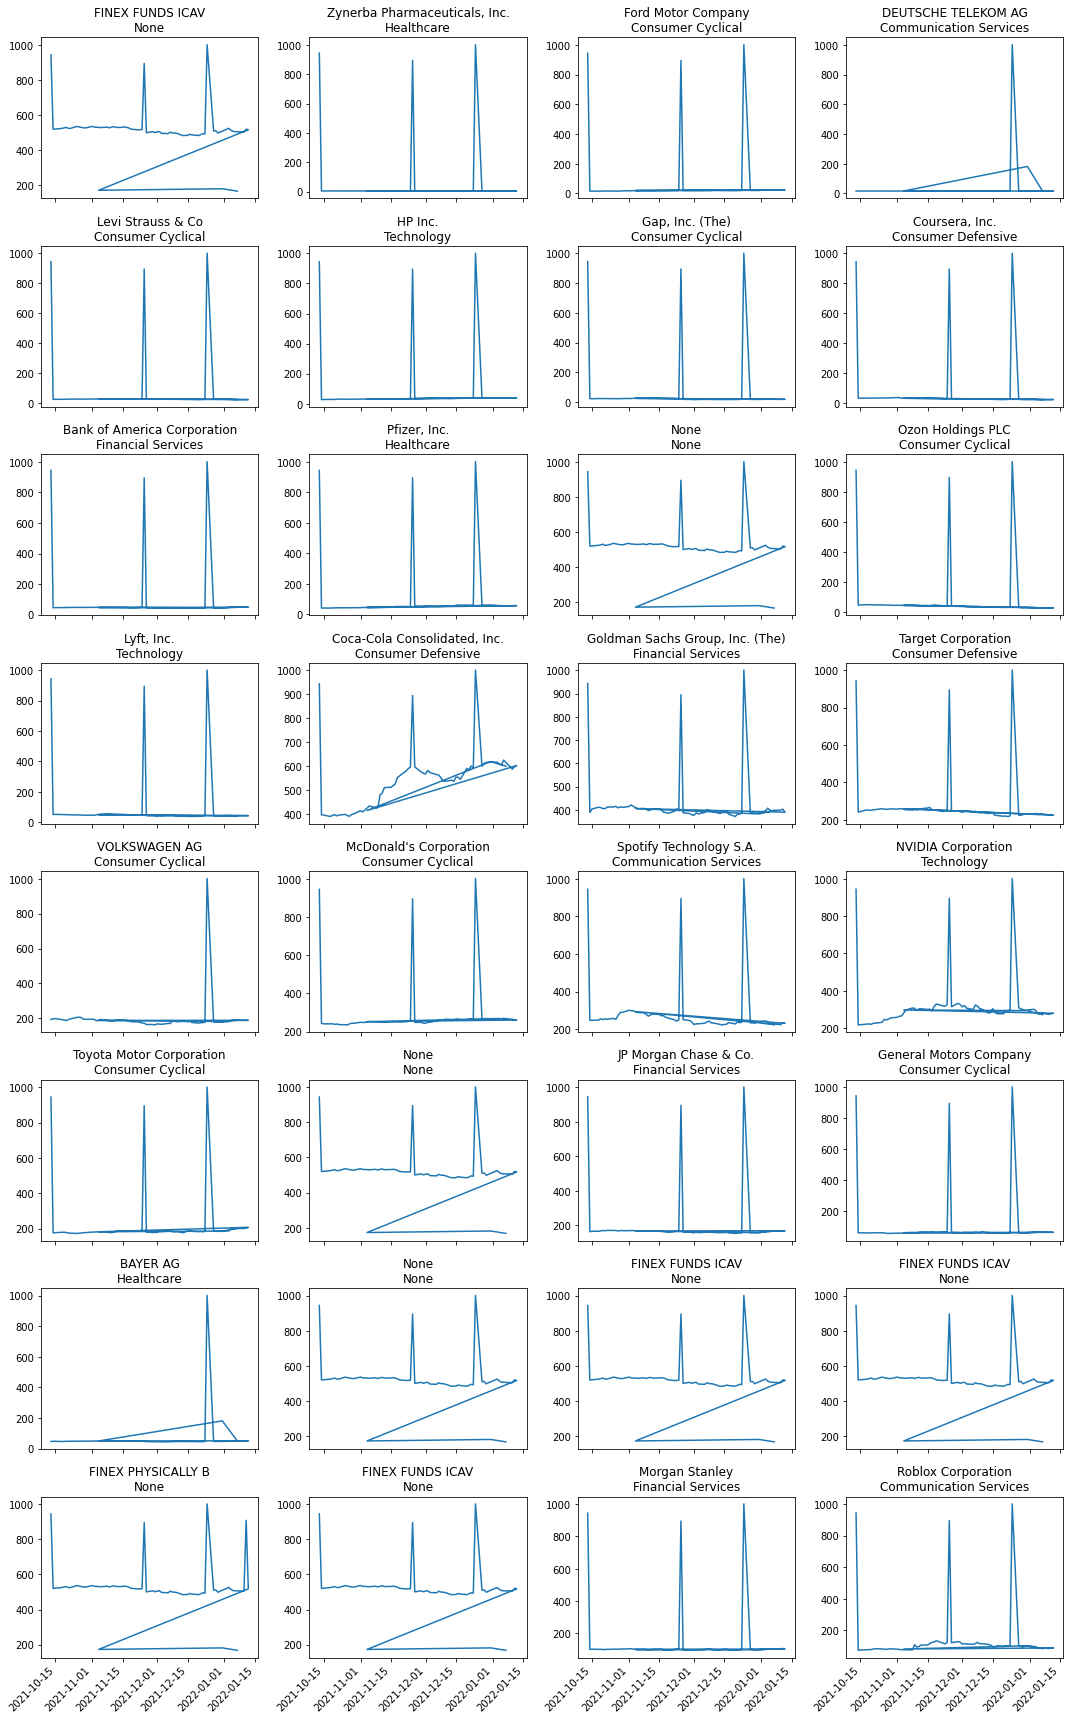

                          Cluster number: 2


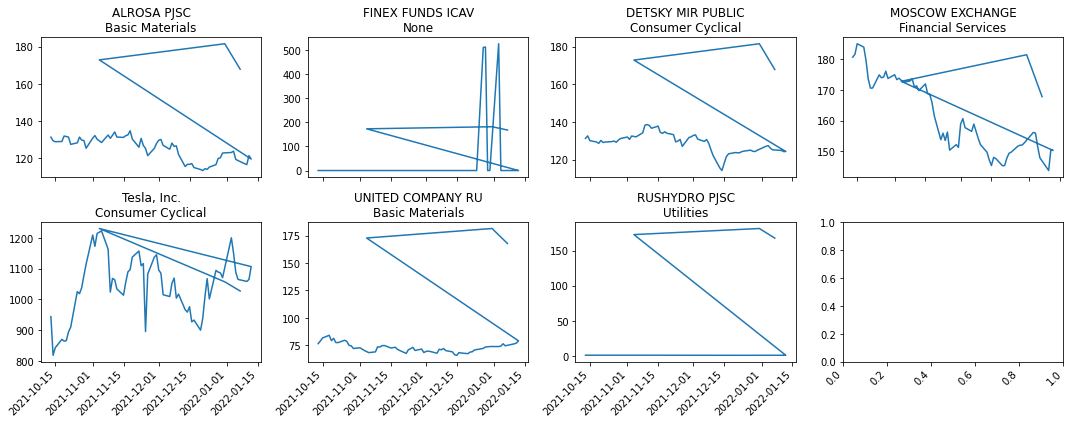

In [23]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(stocks[stocks.cluster == cluster])

what the fuck right above with the plots